In [302]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import joblib

# Load dataset / imports the dataset
df = pd.read_csv("student_performance.csv")

# dislpys the dataset
df

,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
0,S00001,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C
1,S00002,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D
2,S00003,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D
3,S00004,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B
4,S00005,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,S09996,20,Male,30,Auditory,6,Yes,62,58,76,Yes,Medium,17,6,C
9996,S09997,23,Female,16,Visual,8,Yes,54,84,86,Yes,Medium,6,5,B
9997,S09998,26,Male,23,Visual,3,Yes,54,40,70,No,Medium,20,8,D
9998,S09999,18,Male,41,Reading/Writing,7,Yes,66,45,90,Yes,Low,6,8,D


In [303]:
#DATA CLEANING#

In [304]:
#print the percentage of missing informations for each column 
missing_percentage = df.isnull().sum() / len(df) * 100
print(missing_percentage)

#prints any duplicates - print 0
print(df.duplicated().sum())

#displays the number of values under each category for the preferred learning style
df.Preferred_Learning_Style.value_counts()

Student_ID                                 0.0
Age                                        0.0
Gender                                     0.0
Study_Hours_per_Week                       0.0
Preferred_Learning_Style                   0.0
Online_Courses_Completed                   0.0
Participation_in_Discussions               0.0
Assignment_Completion_Rate (%)             0.0
Exam_Score (%)                             0.0
Attendance_Rate (%)                        0.0
Use_of_Educational_Tech                    0.0
Self_Reported_Stress_Level                 0.0
Time_Spent_on_Social_Media (hours/week)    0.0
Sleep_Hours_per_Night                      0.0
Final_Grade                                0.0
dtype: float64
0


Preferred_Learning_Style
Visual             2523
Kinesthetic        2513
Reading/Writing    2498
Auditory           2466
Name: count, dtype: int64

In [305]:
# uses one hot encoding to transform categorical data into numerica data by taking the categories in column and turning those into columns that only have the false for that row doesn't fit into that category or true if it does
# another way this could have been done was label encoding. This asssigns each category in a column a number and tehn uses teh number inplace of that category.
df = pd.concat([df.drop('Preferred_Learning_Style', axis = 1), pd.get_dummies(df.Preferred_Learning_Style).add_prefix("PLS_")], axis = 1)
df = pd.concat([df.drop('Gender', axis = 1), pd.get_dummies(df.Gender).add_prefix("G_")], axis = 1)

#This changes the true and false into binary/numerical values(1 and 0)
bool_cols = df.select_dtypes(include=['bool']).columns  # Select boolean columns
df[bool_cols] = df[bool_cols].astype(int)  # Convert them to 0 and 1

#This changes the yes or no into binary - numerical
df['Participation_in_Discussions'] = df['Participation_in_Discussions'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Use_of_Educational_Tech'] = df['Use_of_Educational_Tech'].apply(lambda x: 1 if x == 'Yes' else 0)

# Define the order of grades to be used in encoding
grade_order = [['A', 'B', 'C', 'D', 'F']]  # The list specifies the order of the grades from highest ('A') to lowest ('F')
grade_encoder = OrdinalEncoder(categories = grade_order)# Initialize the OrdinalEncoder with the specified grade order
# Apply the encoder to the 'Final_Grade' column and create a new column 'Final_Grade_Encoded'
# This new column will contain the encoded values where 'A' will be 0, 'B' will be 1, and so on
df['Final_Grade_Encoded'] = grade_encoder.fit_transform(df[['Final_Grade']])

# label encoding for stress levels
stress_level_order = [['Low', 'Medium', 'High']]
stress_encoder = OrdinalEncoder(categories=stress_level_order)
df['Stress_Level_Encoded'] = stress_encoder.fit_transform(df[['Self_Reported_Stress_Level']])

df# displays  

,Student_ID,Age,Study_Hours_per_Week,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,...,Final_Grade,PLS_Auditory,PLS_Kinesthetic,PLS_Reading/Writing,PLS_Visual,G_Female,G_Male,G_Other,Final_Grade_Encoded,Stress_Level_Encoded
0,S00001,18,48,14,1,100,69,66,1,High,...,C,0,1,0,0,1,0,0,2.0,2.0
1,S00002,29,30,20,0,71,40,57,1,Medium,...,D,0,0,1,0,1,0,0,3.0,1.0
2,S00003,20,47,11,0,60,43,79,1,Low,...,D,0,1,0,0,1,0,0,3.0,0.0
3,S00004,23,13,0,1,63,70,60,1,Low,...,B,1,0,0,0,1,0,0,1.0,0.0
4,S00005,19,24,19,1,59,63,93,1,Medium,...,C,1,0,0,0,1,0,0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,S09996,20,30,6,1,62,58,76,1,Medium,...,C,1,0,0,0,0,1,0,2.0,1.0
9996,S09997,23,16,8,1,54,84,86,1,Medium,...,B,0,0,0,1,1,0,0,1.0,1.0
9997,S09998,26,23,3,1,54,40,70,0,Medium,...,D,0,0,0,1,0,1,0,3.0,1.0
9998,S09999,18,41,7,1,66,45,90,1,Low,...,D,0,0,1,0,0,1,0,3.0,0.0


In [306]:
# remove the student_ID column
df.columns = df.columns.str.strip() #remove unessecary spaces
df = df.drop(columns=["Student_ID"], errors="ignore") # drops the studen id column
df = df.drop(columns=["Final_Grade"], errors="ignore") # drops final grade column that was not numerical
df = df.drop(columns=["Self_Reported_Stress_Level"], errors="ignore") # drops stress level column that was not numerical
print(df.columns) # print out the columns

Index(['Age', 'Study_Hours_per_Week', 'Online_Courses_Completed',
       'Participation_in_Discussions', 'Assignment_Completion_Rate (%)',
       'Exam_Score (%)', 'Attendance_Rate (%)', 'Use_of_Educational_Tech',
       'Time_Spent_on_Social_Media (hours/week)', 'Sleep_Hours_per_Night',
       'PLS_Auditory', 'PLS_Kinesthetic', 'PLS_Reading/Writing', 'PLS_Visual',
       'G_Female', 'G_Male', 'G_Other', 'Final_Grade_Encoded',
       'Stress_Level_Encoded'],
      dtype='object')


In [307]:
# not relevant for the program
print(df.dtypes)  # Shows data types of each column makes sure it is all numerical

Age                                          int64
Study_Hours_per_Week                         int64
Online_Courses_Completed                     int64
Participation_in_Discussions                 int64
Assignment_Completion_Rate (%)               int64
Exam_Score (%)                               int64
Attendance_Rate (%)                          int64
Use_of_Educational_Tech                      int64
Time_Spent_on_Social_Media (hours/week)      int64
Sleep_Hours_per_Night                        int64
PLS_Auditory                                 int64
PLS_Kinesthetic                              int64
PLS_Reading/Writing                          int64
PLS_Visual                                   int64
G_Female                                     int64
G_Male                                       int64
G_Other                                      int64
Final_Grade_Encoded                        float64
Stress_Level_Encoded                       float64
dtype: object


In [308]:
#DATA VISUALISATION#

In [309]:
# shows the relationships between pairs of numerical columns in the DataFrame
# It measures how strongly each pair of variables is related, with values ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation), and 0 indicating no correlation.
correlation_matrix = df.corr()

# This will print the correlation values to the console so you can inspect how variables relate to each other
print(correlation_matrix)

                                              Age  Study_Hours_per_Week  \
Age                                      1.000000             -0.002108   
Study_Hours_per_Week                    -0.002108              1.000000   
Online_Courses_Completed                -0.004895              0.025951   
Participation_in_Discussions             0.007966              0.012019   
Assignment_Completion_Rate (%)          -0.006275              0.000894   
Exam_Score (%)                           0.001693              0.004084   
Attendance_Rate (%)                     -0.014050              0.007768   
Use_of_Educational_Tech                 -0.011253              0.004794   
Time_Spent_on_Social_Media (hours/week)  0.012660              0.010380   
Sleep_Hours_per_Night                    0.012052              0.010908   
PLS_Auditory                             0.002364             -0.003949   
PLS_Kinesthetic                          0.001384              0.011145   
PLS_Reading/Writing      

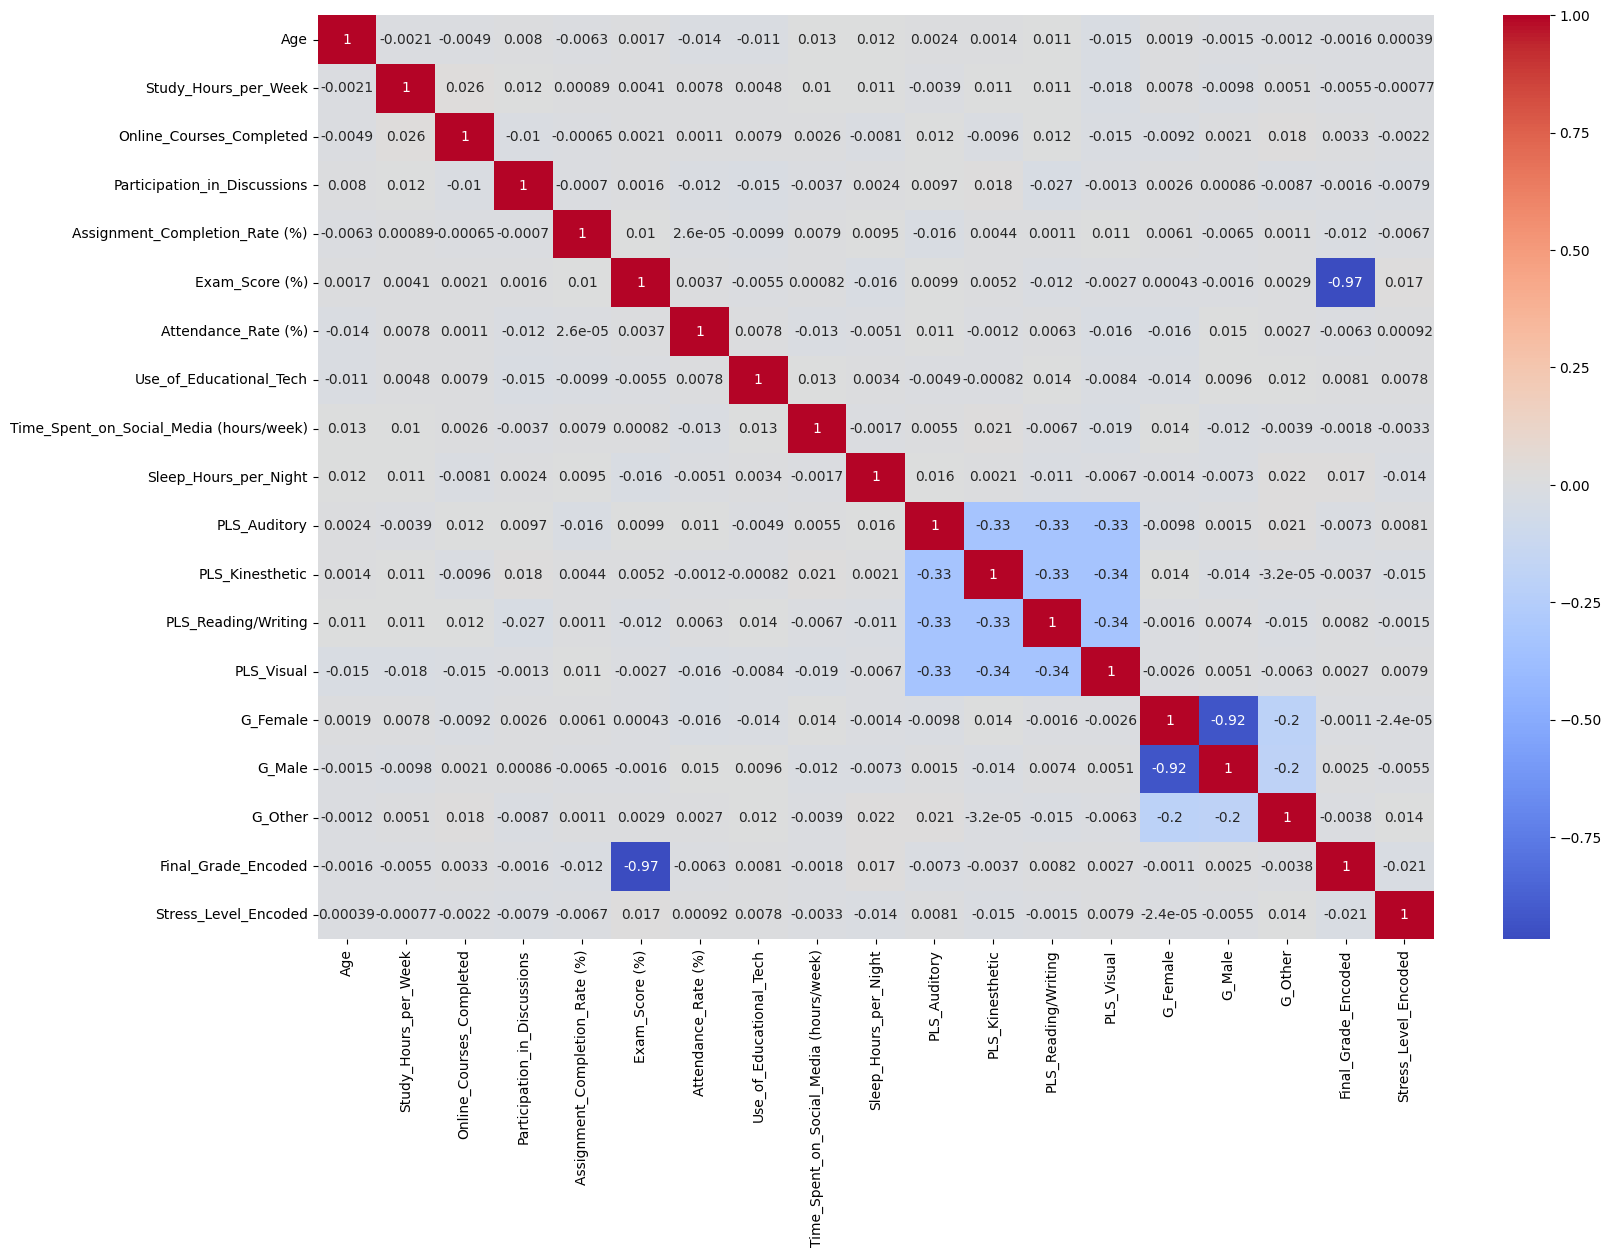

In [310]:
plt.figure(figsize = (18, 12)) #Sets the figure size for the heatmap (width, height in inches)
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm') # Creates a heatmap to visualize the correlation matrix of the DataFrame
plt.show() #displays the plot

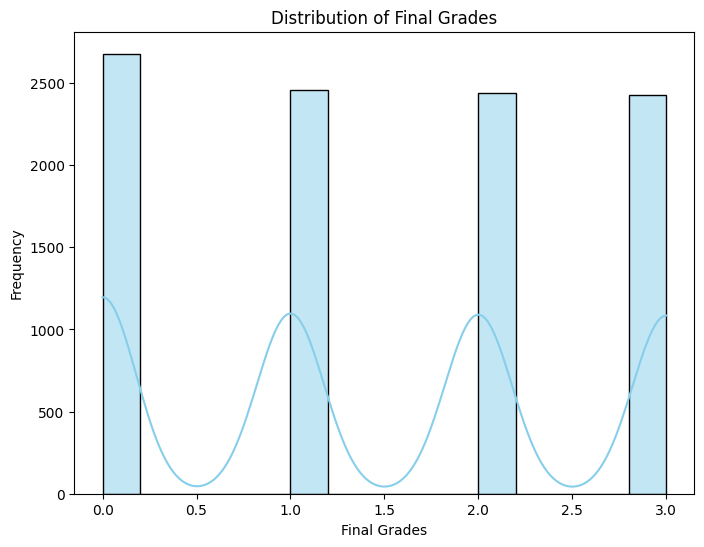

In [311]:
# Plot a histogram for a column (e.g., 'Grade')
plt.figure(figsize=(8, 6))
sns.histplot(df['Final_Grade_Encoded'], bins=15, kde=True, color='skyblue')
plt.title('Distribution of Final Grades')
plt.xlabel('Final Grades')
plt.ylabel('Frequency')
plt.show()

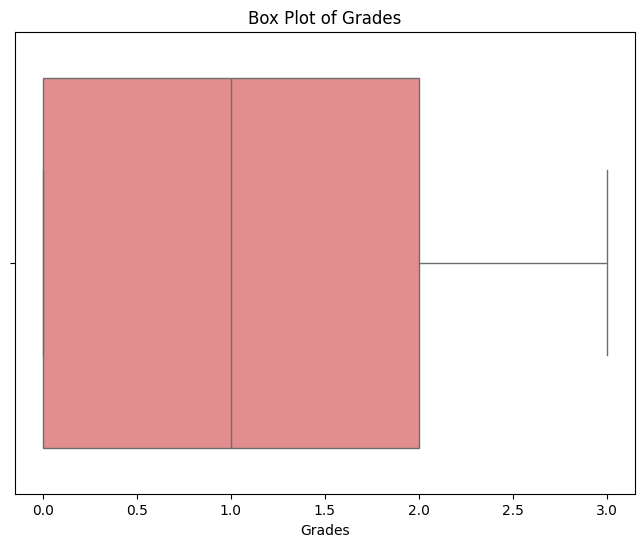

In [312]:
# Plot a box plot for a column (e.g., 'Grade')
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Final_Grade_Encoded'], color='lightcoral')
plt.title('Box Plot of Grades')
plt.xlabel('Grades')
plt.show()


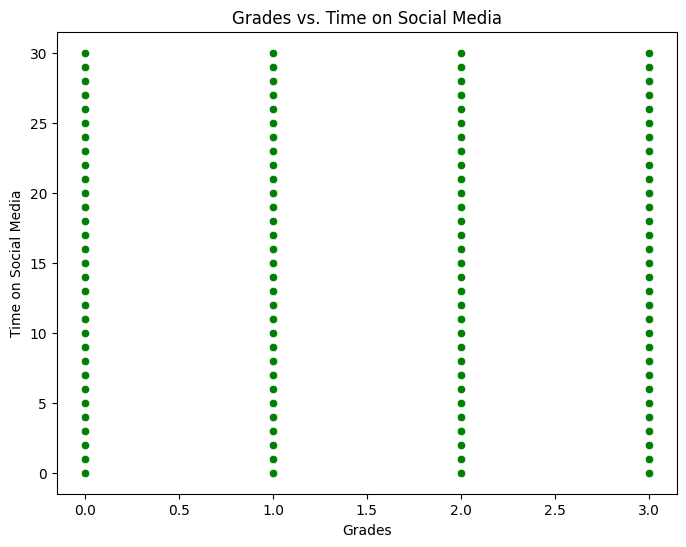

In [313]:
# Plot a scatter plot between two columns (e.g., 'Study Hours' vs. 'Grade')
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Final_Grade_Encoded'], y=df['Time_Spent_on_Social_Media (hours/week)'], color='green')
plt.title('Grades vs. Time on Social Media')
plt.xlabel('Grades')
plt.ylabel('Time on Social Media')
plt.show()


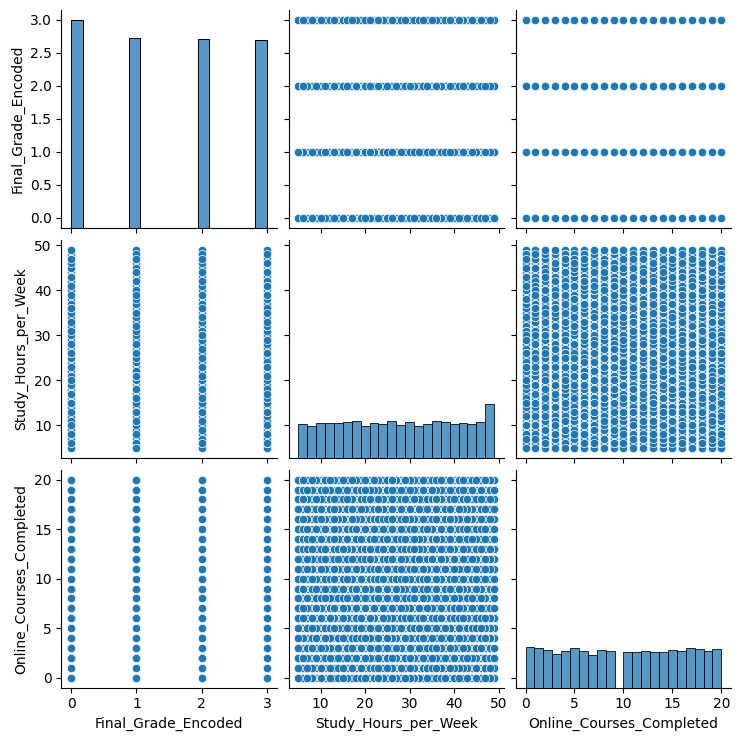

In [314]:
sns.pairplot(df[['Final_Grade_Encoded', 'Study_Hours_per_Week', 'Online_Courses_Completed']])# Create a pairplot to visualize relationships between selected columns
plt.show()

In [315]:
#DAT TRAINING AND TESTING

In [316]:
X = df.drop(columns=['Final_Grade_Encoded']) # Drop target variable from features (independent variable)
y = df['Final_Grade_Encoded'] # Target variable (what we want to predict)(dependent variable)

# Stratified split (for imbalanced classes) was not used because there was not inbalance in the data
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# stratify=y: ensures that the distribution of the target variable (y) is the same in both training and testing sets

#train_test_split: used to split the data into training and testing sets
# test_size=0.2:  20% of the data will be used for testing, and 80% for training
# random_state=42: ensures reproducibility by fixing the random seed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the shape (size) of the training and testing data
print(f"Training data (X_train) shape: {X_train.shape}")
print(f"Testing data (X_test) shape: {X_test.shape}")

Training data (X_train) shape: (8000, 18)
Testing data (X_test) shape: (2000, 18)


In [317]:
model_lr = LinearRegression()# model_lr an instance of the LinearRegression class, which will be used to fit the model to the data

# The model learns the relationship between the features (X_train) and the target variable (y_train)
# The model will calculate the optimal coefficients to best predict the target variable from the input features
model_lr.fit(X_train, y_train)

#Predict the target variable (y) on the test data (X_test)
# The model uses what it learned during the training phase to make predictions on the unseen test data
y_pred_lr = model_lr.predict(X_test)

In [318]:
# Calculate MSE (Mean Squared Error)
# MSE measures the average squared difference between the predicted and actual values.
# A lower MSE indicates a better fit of the model, meaning the model's predictions are closer to the actual values.
mse_lr = mean_squared_error(y_test, y_pred_lr)

# Calculate RMSE (Root Mean Squared Error) manually
# RMSE is the square root of MSE and gives the error in the same units as the target variable.
# a lower RMSE indicates a better model, but RMSE is more interpretable because it’s in the original units.
rmse_lr = np.sqrt(mse_lr)

# Calculate R-squared
# R²represents the proportion of the variance in the target variable that is predictable from the features.
# the closer it is to 1 indicates that the model explains most of the variance, while a value closer to 0 indicates a poor fit.
r2_lr = r2_score(y_test, y_pred_lr)

# Print the calculated metrics
print(f"Linear Regression - MSE: {mse_lr}, RMSE: {rmse_lr}, R^2: {r2_lr}")

Linear Regression - MSE: 0.07968414869493694, RMSE: 0.2822838087721946, R^2: 0.9379250303854423


In [319]:
# This code performs hyperparameter tuning for a DecisionTreeClassifier using GridSearchCV.
# It searches for the best combination of hyperparameters ('max_depth' and 'min_samples_split') from a defined parameter grid by evaluating different combinations with cross-validation (cv=5). 
# The model is then trained on the training data (X_train, y_train) and the best model is selected based on its accuracy. 
# After finding the best model, predictions are made on the test set (X_test), and the accuracy of the optimized Decision Tree model is printed to assess its performance.

param_grid = {'max_depth': [5, 10, 15, None], 'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred_optimized = best_model.predict(X_test)
print(f"Optimized Decision Tree Accuracy: {accuracy_score(y_test, y_pred_optimized)}")


Optimized Decision Tree Accuracy: 1.0


In [320]:
print(X_train.columns)

Index(['Age', 'Study_Hours_per_Week', 'Online_Courses_Completed',
       'Participation_in_Discussions', 'Assignment_Completion_Rate (%)',
       'Exam_Score (%)', 'Attendance_Rate (%)', 'Use_of_Educational_Tech',
       'Time_Spent_on_Social_Media (hours/week)', 'Sleep_Hours_per_Night',
       'PLS_Auditory', 'PLS_Kinesthetic', 'PLS_Reading/Writing', 'PLS_Visual',
       'G_Female', 'G_Male', 'G_Other', 'Stress_Level_Encoded'],
      dtype='object')


In [321]:
print("Min y_train:", y_train.min(), "Max y_train:", y_train.max())


Min y_train: 0.0 Max y_train: 3.0


In [322]:
print(model_lr.predict(X_test[:10]))  # Check first 10 test predictions


[-2.35072321e-02  2.93179071e+00  2.31602822e+00  8.28242126e-01
  1.57148764e+00  3.62272867e-01  2.91418966e+00  2.77375200e+00
  1.06372292e+00  1.70843375e-03]


In [323]:
#stoe the trained mode; so it can be used
joblib.dump(model_lr, 'model.pkl')

['model.pkl']